In [51]:
import sklearn
sklearn.__version__

'0.23.1'

In [2]:
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd

# Pipelines in scikit-learn

## Non-pipeline setup

Let's start easy. A dataset that works. We'll come back on the complex one above soon.

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [4]:
dataset = load_breast_cancer()

X = dataset['data']
y = dataset['target']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [7]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [8]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold,cross_val_score

cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=KFold(n_splits=10, shuffle=True))

array([0.96989247, 0.99791667, 0.99375   , 0.99431818, 1.        ,
       1.        , 1.        , 1.        , 0.99595142, 1.        ])

In [9]:
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.99737962659679

## Now doing it in a Pipeline.

In [10]:
from sklearn.pipeline import Pipeline
from sklearn import set_config

# set_config(display='diagram')

Remember? Pipelines are composed by a sequence of steps:
    
Specifically, sklearn-pipelines are composed of named steps as tuples like :
    
```('dataprep', StandardScaler(),
 'model', LogisticRegression())```

In [11]:
model = LogisticRegression()

In [52]:
pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                           ('model', LogisticRegression())
                          ])

In [63]:
set_config(display='text')

In [66]:
model = LogisticRegression(C=0.1, penalty='l1')

In [67]:
model

LogisticRegression(C=0.1, penalty='l1')

In [60]:
set_config(display='diagram')

In [53]:
pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [13]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

Under the hood, when you run `pipeline.fit()`, the Pipeline will run each steps' `.fit_transform()` method until the last step, where it will run `.fit()` as you've requested.

In [14]:
pipeline.predict(X_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [15]:
pipeline.predict_proba(X_test)[:, 1]

array([8.85672563e-01, 9.03924655e-06, 3.09834256e-03, 9.99489037e-01,
       9.99939117e-01, 9.60957939e-11, 1.57079869e-09, 3.51340843e-02,
       6.19293778e-01, 9.99235368e-01, 9.50016097e-01, 1.24248369e-02,
       9.93931210e-01, 1.45686895e-01, 9.98370282e-01, 7.61463718e-04,
       9.98139178e-01, 9.99988681e-01, 9.99999171e-01, 1.14290643e-06,
       9.15605194e-01, 9.90219887e-01, 4.43242454e-09, 9.99920493e-01,
       9.98852921e-01, 9.99418546e-01, 9.98914330e-01, 9.93946402e-01,
       9.97129071e-01, 8.11567745e-06, 9.99480324e-01, 9.99850625e-01,
       9.97792446e-01, 9.94485622e-01, 9.99857873e-01, 9.97551009e-01,
       5.78533757e-02, 9.97045389e-01, 8.96287263e-05, 9.51657452e-01,
       9.99927965e-01, 4.04951942e-04, 9.97515908e-01, 9.99027239e-01,
       9.79797581e-01, 9.27343486e-01, 9.99594294e-01, 9.99502132e-01,
       9.69205141e-01, 9.99385793e-01, 1.20487572e-04, 5.39214820e-08,
       6.90751901e-01, 9.86705365e-01, 9.99972429e-01, 9.90345548e-01,
      

When you run `pipeline.predict()`, the Pipeline will run `.transform()` until the last step, where it will run `.predict()` as you've requested.

# A more complex example

We have a problem that we need to perform some preprocessing in some specific columns (the categorical ones) and another preprocessing in numerical columns

In [16]:
df = pd.read_csv('data/loan_dataset_train.csv')

X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df.Loan_Status.apply(lambda x : 1 if x == 'Y' else 0)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [18]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
360,Female,No,1,Graduate,No,4723,0.0,81.0,360.0,1.0,Semiurban
473,Female,No,0,Graduate,Yes,2500,0.0,93.0,360.0,NaN,Urban
359,Male,Yes,3+,Graduate,No,5167,3167.0,200.0,360.0,1.0,Semiurban
519,Female,No,0,Not Graduate,No,3400,0.0,95.0,360.0,1.0,Rural
557,Male,Yes,3+,Graduate,Yes,10139,0.0,260.0,360.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
198,Female,Yes,0,Graduate,No,3416,2816.0,113.0,360.0,NaN,Semiurban
38,Male,No,0,Graduate,No,4166,7210.0,184.0,360.0,1.0,Urban
280,Male,No,1,Not Graduate,Yes,4053,2426.0,158.0,360.0,0.0,Urban
285,Male,No,0,Graduate,No,3158,3053.0,89.0,360.0,1.0,Rural


In [19]:
#pipeline = Pipeline(steps=[('dataprep', StandardScaler()),
#                           ('model', LogisticRegression())
#                          ])

#pipeline.fit(X_train, y_train)

## Pipeline steps:

My pipeline can usually be written in terms of `preprocessing` $\to$ `modelling`

## Preprocessing Step

### For categorical columns I want to
1. Input missing using the `most_frequent` strategy
2. Create a `OrdinalEncoder` to represent strings as ordered numbers

### For numericals columns I want to
1. Input missing using the `median` strategy
2. Transform data using a `StandardScaler`

## Selecting categorical columns

In [20]:
cat_columns = list(X_train.select_dtypes('object').columns)
cat_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

### Creating categorical imputer

In [21]:
from sklearn.impute import SimpleImputer

categorical_imputer = SimpleImputer(strategy='most_frequent')

### Creating categorical encoder 

In [22]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

ordinal_encoder = OrdinalEncoder()
onehotencoder = OneHotEncoder(drop='first',  handle_unknown='error')

## Selecting numerical columns

In [23]:
num_columns = list(X_train.select_dtypes(exclude='object').columns)
num_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

### Creating numerical imputer

In [24]:
numerical_imputer = SimpleImputer(strategy='median')

### Creating numerical scaler

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## Create Pipeline 

In order to perform a steps for specific columns, we'll need to create a pipeline of pipelines. Let's see how:

In [26]:
from sklearn.pipeline import Pipeline

### Create a pipeline for the categorical and numerical columns

In [27]:
categorical_pipeline = Pipeline(steps=[('missing', categorical_imputer),
                                       ('encode', onehotencoder)])

In [28]:
numerical_pipeline = Pipeline(steps=[('missing', numerical_imputer),
                                     ('standardize', scaler)])

### Create a composition of these two pipelines

Using ColumnTransformer, you can specify the columns for which you want the pipeline to be used. This will be my whole `dataprep` step.

ColumnsTransformer requires `triple named tuples`, that is, tuples like:

```[('name_of_transformation', pipeline, features_to_apply_pipeline), ... ]
```

In [29]:
from sklearn.compose import ColumnTransformer

dataprep = ColumnTransformer(transformers=[('numerical_transform', numerical_pipeline, num_columns),
                                           ('categ_transform', categorical_pipeline, cat_columns)])

### Create modelling step

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.1)

In [31]:
pipeline = Pipeline(steps=[('preprocessing', dataprep),
                           ('modelling', model)])

In [32]:
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical_transform',
                                                  Pipeline(steps=[('missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('categ_transform',
                                                  Pipeline(steps=[('missing',
                                               

In [33]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical_transform',
                                                  Pipeline(steps=[('missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('categ_transform',
                                                  Pipeline(steps=[('missing',
                                               

In [34]:
pipeline.predict(X_test)

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [35]:
pipeline.predict_proba(X_test)

array([[0.18520833, 0.81479167],
       [0.25377984, 0.74622016],
       [0.24900871, 0.75099129],
       [0.16373461, 0.83626539],
       [0.26047577, 0.73952423],
       [0.22825846, 0.77174154],
       [0.85829542, 0.14170458],
       [0.83364662, 0.16635338],
       [0.29754421, 0.70245579],
       [0.13452804, 0.86547196],
       [0.24715974, 0.75284026],
       [0.20096516, 0.79903484],
       [0.88799906, 0.11200094],
       [0.21713704, 0.78286296],
       [0.18278579, 0.81721421],
       [0.13523479, 0.86476521],
       [0.14388118, 0.85611882],
       [0.23327741, 0.76672259],
       [0.18214674, 0.81785326],
       [0.22129053, 0.77870947],
       [0.17992072, 0.82007928],
       [0.2506581 , 0.7493419 ],
       [0.26462065, 0.73537935],
       [0.90175779, 0.09824221],
       [0.20769796, 0.79230204],
       [0.26574937, 0.73425063],
       [0.302068  , 0.697932  ],
       [0.27497336, 0.72502664],
       [0.1751402 , 0.8248598 ],
       [0.14657341, 0.85342659],
       [0.

In [36]:
from sklearn.model_selection import cross_val_score, KFold

In [37]:
cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=KFold(n_splits=10, shuffle=True))

array([0.84670232, 0.60555556, 0.89189189, 0.74912281, 0.77368421,
       0.68793103, 0.57720588, 0.66441441, 0.79054054, 0.80882353])

In [38]:
roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])

0.7708978328173375

In [39]:
from sklearn.model_selection import learning_curve

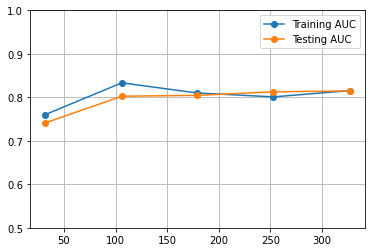

In [40]:
curves = learning_curve(pipeline, X_train, y_train, cv=KFold(n_splits=3, shuffle=True))

train_sizes = curves[0]
train_scores = curves[1]
test_scores = curves[2]
plt.plot(train_sizes, train_scores.mean(axis=1), '-o', label='Training AUC')
plt.plot(train_sizes, test_scores.mean(axis=1), '-o', label='Testing AUC')
plt.grid()
plt.ylim([0.5, 1])
plt.legend()

I'm satisfied with ma model

In [41]:
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical_transform',
                                                  Pipeline(steps=[('missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('categ_transform',
                                                  Pipeline(steps=[('missing',
                                               

In [42]:
# pipeline.named_steps['preprocessing'].named_transformers_['numerical_transform'].named_steps['standardize'].mean_

In [45]:
set_config(display='diagram')

In [46]:
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical_transform',
                                                  Pipeline(steps=[('missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('categ_transform',
                                                  Pipeline(steps=[('missing',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('modelling', LogisticRegression(C=0.1))])

# Persisting (saving) models (or any python object actually) in disk - PICKLE

In [47]:
import pickle

In [50]:
with open('model-v0.pkl','wb') as file:
    pickle.dump(pipeline, file)